# Algorithmic Trading 
Project developed by Beatriz ALves Correia

Date: November-December 2023

In [8]:
# Import needed libraries
import yfinance as yf  # for dataset
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
import mplfinance as mpf

# for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# optimize parameters
import itertools

# better fig quality
%config InlineBackend.figure_format = 'svg'

# ignore future warnings
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

## Technical Analysis

Importing the data for the last 5 years (2019-01-01 to 2023-09-30) of AXP - American Express ticker = AXP

In [10]:
axp = yf.Ticker("AXP")
data = axp.history(start="2019-01-01", end="2023-09-30")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,86.886857,89.070356,86.757320,88.524483,4175400,0.00,0.0
2019-01-03 00:00:00-05:00,88.059996,88.422306,86.610757,86.796555,4776600,0.39,0.0
2019-01-04 00:00:00-05:00,88.598820,91.367239,88.162189,90.707649,4637200,0.00,0.0
2019-01-07 00:00:00-05:00,90.828426,91.896778,90.131675,91.200027,3289000,0.00,0.0
2019-01-08 00:00:00-05:00,91.683096,92.454161,90.596160,91.645935,3227200,0.00,0.0


In [13]:
# 1195 rows and 7 columns
data.shape

(1195, 7)

In [14]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1195 entries, 2019-01-02 00:00:00-05:00 to 2023-09-29 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1195 non-null   float64
 1   High          1195 non-null   float64
 2   Low           1195 non-null   float64
 3   Close         1195 non-null   float64
 4   Volume        1195 non-null   int64  
 5   Dividends     1195 non-null   float64
 6   Stock Splits  1195 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 74.7 KB


Variation of variables Close and Volume over time

c:\Users\beatr\anaconda3\envs\pyspark_env\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


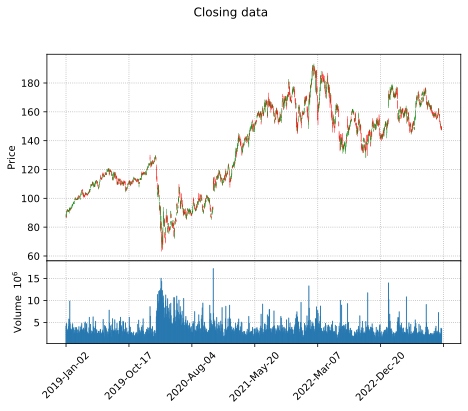

In [15]:
# Plot using mplfinance library
market_plot = mpf.make_marketcolors(up='g', down='r', edge='inherit', volume='gray', wick='inherit')
market_style = mpf.make_mpf_style(marketcolors=market_plot, gridstyle='dotted')

# Ploting Volume and Close variable
mpf.plot(data, type='candle', volume=True, title='Closing data', ylabel='Price', style=market_style)

Based on the representations obtained, it was concluded that the volume of shares maintained a similar trend over the years, with the exception of the period between 2020 and 2021 where there was higher number of sales. This increase can be attributed to the fall in the closing price of AmEx of AmEx shares in the same period, related to the COVID-19 pandemic.

Metrics Analysis

In [16]:
# Calculate daily returns
data['Daily Returns'] = data['Close'].pct_change()
data['Daily Returns']

Date
2019-01-02 00:00:00-05:00         NaN
2019-01-03 00:00:00-05:00   -0.019519
2019-01-04 00:00:00-05:00    0.045060
2019-01-07 00:00:00-05:00    0.005428
2019-01-08 00:00:00-05:00    0.004889
                               ...   
2023-09-25 00:00:00-04:00    0.000980
2023-09-26 00:00:00-04:00   -0.013770
2023-09-27 00:00:00-04:00   -0.008073
2023-09-28 00:00:00-04:00    0.002201
2023-09-29 00:00:00-04:00   -0.006923
Name: Daily Returns, Length: 1195, dtype: float64

Daily returns evolution over time

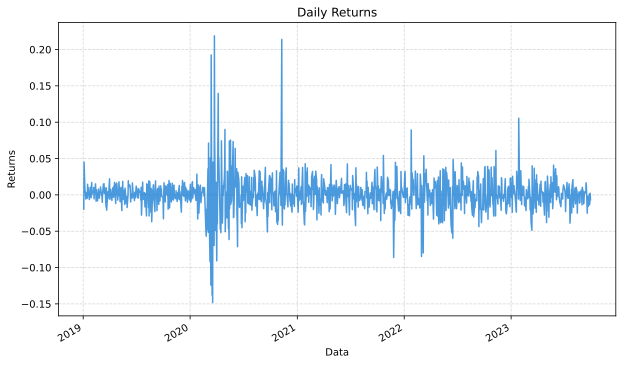

In [17]:
# graphic representation of the daily returns of the shares

plt.figure(figsize=(10, 6))  #figure size

# plot the daily returns
data['Daily Returns'].plot(kind='line', color='#016fd0', linestyle='-', linewidth=1.5, alpha=0.7)

# labels and title
plt.title('Daily Returns')
plt.xlabel('Data')
plt.ylabel('Returns')

# grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# show plot
plt.show()

In [18]:
# Calcultate the expected mean returns
mean_returns = data['Daily Returns'].mean()
mean_returns

0.000716371880957007

In [19]:
# Calculate the cumulative returns
cumulative_return = (1 + data['Daily Returns']).cumprod() - 1
data['Cumulative Returns'] = cumulative_return

# drop the na created with the calculation
data['Cumulative Returns'].dropna()
cumulative_return[-1]

0.6678282259686024

In [20]:
# calculate market volatility 
volatility = data['Daily Returns'].std()
volatility

0.024195161777383397

In [21]:
# calculate CAGR
initial_investment = 100

# calculate final investment result for cagr purposes
final_portfolio_value = initial_investment * data['Cumulative Returns'].iloc[-1]
num_years = len(data) / 252  # dados sao diarios

cagr = (final_portfolio_value / initial_investment) ** (1 / num_years) - 1
print(cagr)

-0.08161339321325367


Based on the analysized metrics and the plot of Daily Returns over time, it can be concluded that AmEx represents an investment with a relatively low relatively low average expected return. Market volatility is observed to be low, indicating a somewhat stable investment. The Gain Loss Ratio and the accumulated return suggest that there have been net gains over the period, with gains outweighing losses. In addition, the CAGR points to modest and consistent growth over time.

## Data Preparation

Due to the columns created Daily Returns and Cumulative Returns there was one missing value which was removed.

In [23]:
# check missing values
missing_values = data.isnull().sum()
missing_values

Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Dividends             0
Stock Splits          0
Daily Returns         1
Cumulative Returns    1
dtype: int64

In [24]:
# remove missing values
data = data.dropna()
missing_values = data.isnull().sum()
missing_values

Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Dividends             0
Stock Splits          0
Daily Returns         0
Cumulative Returns    0
dtype: int64

#### Moving Average Analysis

Two indicators were used to implement the trading strategies: Moving Average and Moving Average Convergence/Divergence (MACD). 
The first calculates the average of a set of adjacent data points over time in order to smooth out short-term variations. variations, making it possible to highlight trends,cyclical patterns or seasonal variations in the data. MACD is a momentum indicator that aims to identify changes in the strength and direction of trends. It contains two components, the first of which is the MACD Line, which is the difference between long-term and short-term exponential moving averages and the Signal Line corresponding to the exponential of the MACD Line.

Text(0, 0.5, 'Preço em $')

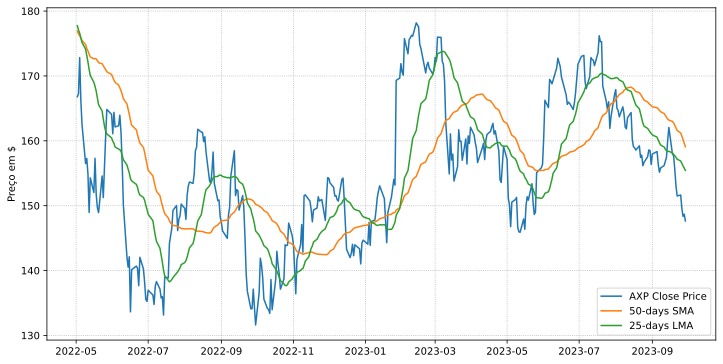

In [25]:
# Analysis with moving average 
start_date = "2022-05-02"
end_date = "2023-09-29"

# calculate a short window moving average (25 days)
short_rolling = data.rolling(window=25).mean() 

# calculate a long window moving average (50 days)
long_rolling = data.rolling(window=50).mean()

# plot
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close'], label='AXP Close Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '50-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '25-days LMA')

ax.legend(loc='best')
ax.set_ylabel('Preço em $')

In addition, the "Short_MA" and "Long_MA" variables were incorporated into the data set. "Long_MA", corresponding to the short and long term moving averages, respectively. The purpose of this addition is to introduce information on short and long-term trends, which can be considered relevant for the machine learning model to be used in the next phase. The choice was made to use windows of 25 and 50 days, after several attempts with different values, as this combination resulted in a more effective smoothing of the time series, as shown in time series above.

In [26]:
# create short and long moving average columns for the dataset
data['Short_MA'] = data['Close'].rolling(window=25).mean()
data['Long_MA'] = data['Close'].rolling(window=70).mean()

C:\Users\beatr\AppData\Local\Temp\ipykernel_32772\2902276285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Short_MA'] = data['Close'].rolling(window=25).mean()
C:\Users\beatr\AppData\Local\Temp\ipykernel_32772\2902276285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Long_MA'] = data['Close'].rolling(window=70).mean()


# Auxiliary functions

### Function trading_strategy1
- Implements a trading strategy that generates buy and sell signals based on comparing the closing price of an asset with its moving average. If the price is above the moving average, the function suggests sell (signal 1), and if it is below, it suggests buying (-1 signal). The "window" parameter defines the period for calculating the moving average. The function returns a DataFrame containing these signals stored in the Signal_MA" column, for each data point provided.

In [27]:
def trading_strategy1(data, window):
    signals = pd.DataFrame(index=data.index)
    signals['Signal_MA'] = np.where(data['Close'] > data['Close'].rolling(window=window).mean(), 1, -1)
    return signals

### Function calculate_macd
- Aims to calculate the components of the MACD (Moving Average Convergence Divergence)
- input: data, short_window, long_window, signal_period
- output: macd, signal line

In [34]:
def calculate_macd(data, short_window, long_window, signal_period):
    ema_short = data['Close'].ewm(span=short_window, min_periods=1, adjust=False).mean()
    ema_long = data['Close'].ewm(span=long_window, min_periods=1, adjust=False).mean()
    macd = ema_long - ema_short
    signal_line = macd.ewm(span=signal_period, min_periods=1, adjust=False).mean()
    return macd, signal_line

### Function trading_strategy2
- Implements the trading strategy using the MACD indicator, which is calculated by the "calculate_macd" helper function, mentioned above. Based on the time window parameters provided, the MACD and its signal line are determined. The strategy generates a sell signal (1) when the MACD is above the signal line, and a buy signal (-1) when it is below. Finally, the function returns a DataFrame containing the trading signals.

In [35]:
def trading_strategy2(data, short_window, long_window, signal_period):
    # using calculate_macd to calculate the macd components
    macd, signal_line = calculate_macd(data, short_window, long_window, signal_period)

    # add macd and signal line to the signals_macd dataset
    signals_macd = data.copy()
    signals_macd['MACD'] = macd
    signals_macd['Signal_Line'] = signal_line

    # generate trading signals
    signals_macd['Signal_MACD'] = 0
    signals_macd.loc[signals_macd['MACD'] > signals_macd['Signal_Line'], 'Signal_MACD'] = 1
    signals_macd.loc[signals_macd['MACD'] < signals_macd['Signal_Line'], 'Signal_MACD'] = -1

    return signals_macd

### Function backtesting
- It is intended for backtesting a trading strategy based on predictions from a machine learning model. It calculates the performance metrics referred to in the technical analysis and returns a DataFrame with the signals and returns, as well as the calculated performance metrics.

Metrics: Daily Returns, Cumulative Returns, Volatility, Expected Mean Returns, CAGR, Final Portfolio Value

In [36]:
def backtesting_strategy(predictions, X_test, data, initial_investment=100):
    # model predictions
    predictions_rf = predictions

    # dataframe creation with the signals 
    signals_df = pd.DataFrame({'Predicted_Signal': predictions_rf}, index=X_test.index)

    # calculate daily returns - multiply signal with next day return
    signals_df['Daily Return'] = data['Close'].pct_change().shift(-1).fillna(0) * signals_df['Predicted_Signal']

    # calculate Cumulative Returns
    signals_df['Cumulative Return'] = (1 + signals_df['Daily Return']).cumprod()

    # More metrics
    num_trading_days = len(signals_df)
    volatility = signals_df['Daily Return'].std() * np.sqrt(num_trading_days)
    asset_mean_returns = signals_df['Daily Return'].mean()
    final_portfolio_value = initial_investment * signals_df['Cumulative Return'].iloc[-1]
    num_years = len(signals_df) / 252
    cagr = (final_portfolio_value / initial_investment) ** (1 / num_years) - 1

    print(f"Volatility: {volatility:.4f}")
    print(f"Expected Mean Returns: {asset_mean_returns:.4f}")
    print(f"Cumulative Return: {signals_df['Cumulative Return'].iloc[-1]:.4f}")
    print(f"CAGR: {cagr:.4f}")
    print(f"Resultado Final do investimento: {final_portfolio_value:.4f}")

    return signals_df, volatility, asset_mean_returns, cagr, final_portfolio_value


#### Function to optimize MA window
- The function optimizes "trading_strategy1" parameters, iterating over different window sizes ("window_ranges") to calculate metrics performance metrics such as cumulative return, volatility, average returns and CAGR of the investment. It identifies the most effective window size, returning this value alongside the max portfolio value and other relevant metrics;

In [37]:
def optimize_ma_parameters(data, window_ranges, initial_investment=100):
    max_portfolio = 0
    best_window = None
    best_metrics = None 

    for window in window_ranges:
        # aplt trading strategy 1 with window
        trading_signals = trading_strategy1(data, window)
        trading_data = data.copy()
        trading_data['Signal_MA'] = trading_signals['Signal_MA']  #gerar sinais
        
        # Backtesting
        trading_data['Daily Return'] = trading_data['Close'].pct_change()
        trading_data['Cumulative Return'] = (1 + trading_data['Daily Return']).cumprod()

        # Volatility
        num_trading_days = len(trading_data)
        volatility = trading_data['Daily Return'].std() * np.sqrt(num_trading_days)

        # Asset Mean Returns
        asset_mean_returns = trading_data['Daily Return'].mean()

        # CAGR
        final_portfolio_value = initial_investment * trading_data['Cumulative Return'].iloc[-1]
        num_years = len(trading_data) / 252 
        cagr = (final_portfolio_value / initial_investment) ** (1 / num_years) - 1

        # check if the current window is the best
        if final_portfolio_value > max_portfolio:
            max_portfolio = final_portfolio_value
            best_window = window
            best_metrics = {
                'Volatility': volatility,
                'Asset Mean Returns': asset_mean_returns,
                'CAGR': cagr,
                'Cumulative Return': trading_data['Cumulative Return'].iloc[-1]
            }

    return best_window, max_portfolio, best_metrics

#### Function to optimize MACD parameters (short window, long window, signal period)
- It follows a similar logic to the previous function except it applies "trading_strategy2" and tries to optimize the short and long window along with the signal periods. The output consists of the best parameters found, the value of the portfolio reached and metrics related to the strategy's performance;

In [38]:
def optimize_macd_parameters(data, short_windows, long_windows, signal_periods, initial_investment=100):
    max_portfolio = 0
    best_params = None
    best_metrics = None

    # cicle that iterates through the given values for each parameter
    for short_window in short_windows:
        for long_window in long_windows:
            if short_window < long_window:
                for signal_period in signal_periods:
                   
                    # apply strategy for each parameter value
                    trading_data = trading_strategy2(data, short_window, long_window, signal_period)
                    
                    # Backtesting
                    trading_data['Daily Return'] = trading_data['Close'].pct_change()
                    trading_data['Strategy_Return'] = trading_data['Daily Return'] * trading_data['Signal_MACD'].shift()
                    trading_data['Cumulative Return'] = (1 + trading_data['Strategy_Return']).cumprod()

                    # other metrics
                    num_trading_days = len(trading_data)
                    volatility = trading_data['Daily Return'].std() * np.sqrt(num_trading_days)
                    asset_mean_returns = trading_data['Daily Return'].mean()
                    final_portfolio_value = initial_investment * trading_data['Cumulative Return'].iloc[-1]
                    num_years = len(trading_data) / 252
                    cagr = (final_portfolio_value / initial_investment) ** (1 / num_years) - 1


                    # confirm if the current parameter is the best
                    if final_portfolio_value > max_portfolio:
                        max_portfolio = final_portfolio_value
                        best_params = (short_window, long_window, signal_period)
                        best_metrics = {
                            'Volatility': volatility,
                            'Expected Mean Returns': asset_mean_returns,
                            'CAGR': cagr,
                            'Cumulative Return': trading_data['Cumulative Return'].iloc[-1]
                        }

    return best_params, max_portfolio, best_metrics

#### Function top 5 features
- It extracts the importance of the features used in the model, creates a DataFrame with the name of the feature and its importance, sorts it in descending order and finally returns the top five features.

In [39]:
def top_features(rf_model, features):

    # extract feature importances from the model
    feature_importances = rf_model.feature_importances_

    # create a dataframe that stores the feature name and its importance
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

    # sort the dataframe by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # select the top 5 features
    top_features_df = feature_importance_df.head(5)

    return top_features_df

#### Function that searches the best combination of parameters and model features for the random forest model with moving average
- Function to optimize parameters and feature combinations for the moving averages strategy. The function evaluates different time windows and combinations of features, applying the strategy, training a RandomForest model and making predictions. The aim is to identify the configuration that maximizes the value of the value during the test period. The results, including the best window, the combination of features and the maximum value of the portfolio are presented;

In [40]:
def best_combination_ma(data, window_ranges, all_features, initial_investment=100):
    max_profit = 0
    best_window = None
    best_feature_combination = None
    best_metrics = None

    for window in window_ranges:
        for r in range(1, len(all_features) + 1):
            for subset in itertools.combinations(all_features, r):
                # apply current strategy with different windows and features
                temp_data = data.copy()
                temp_data['Signal_MA'] = trading_strategy1(temp_data, window)
        
                # define target and drop na
                temp_data['Target'] = temp_data['Signal_MA'].shift(-1)
                temp_data = temp_data.dropna()

                X = temp_data[list(subset)]
                y = temp_data['Target']

                # test and train split
                train_start, train_end = '2019-01-03', '2022-04-29'
                test_start, test_end = '2022-05-02', '2023-09-29'
                X_train = X[(X.index >= train_start) & (X.index <= train_end)]
                X_test = X[(X.index >= test_start) & (X.index <= test_end)]
                y_train = y[(y.index >= train_start) & (y.index <= train_end)]
                y_test = y[(y.index >= test_start) & (y.index <= test_end)]

                # train the model
                rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
                rf_model.fit(X_train, y_train)

                # predict and calculate profit
                predictions = rf_model.predict(X_test)
                _, _, _, _, final_portfolio_value = backtesting_strategy(predictions, X_test, temp_data)

                # update values
                if final_portfolio_value > max_profit:
                    max_profit = final_portfolio_value
                    best_window = window
                    best_feature_combination = subset

    return best_window, best_feature_combination, max_profit

#### Best moving average window
Here is provided a range of values to be tested the moving window and also the initial investment. Then its applied the function optimize_ma_parameters to get the values to use.

In [41]:
# range of values to be tested as window
window_ranges = range(10, 100, 10)
initial_investment = 100

# apply function that returns window with highest profit
best_window, max_portfolio, best_metrics = optimize_ma_parameters(data, window_ranges, initial_investment)

# print results
print(f"Best Moving Average Window: {best_window}")
print(f"Final Return of Investment: {max_portfolio}")
print(f"Other Metrics: {best_metrics}")

Best Moving Average Window: 10
Final Return of Investment: 170.10310112038695
Other Metrics: {'Volatility': 0.8361521795462907, 'Asset Mean Returns': 0.0007333338122752117, 'CAGR': 0.11864692646489972, 'Cumulative Return': 1.7010310112038696}


#### Best parameters for MACD (short window, long window e signal line)

In [42]:
# range values for parameters
short_windows = range(5, 35, 5)
long_windows = range(10, 50, 5)
signal_periods = range(5, 20, 5)

# apply optimizer function
best_params, max_portfolio, best_metrics = optimize_macd_parameters(data, short_windows, long_windows, signal_periods, initial_investment)

# print results
print(f"Best MACD: Short Window - {best_params[0]}, Long Window - {best_params[1]}, Signal Period - {best_params[2]}")
print(f"Final Return of Investment: {max_portfolio}")
print(f"Other Metrics: {best_metrics}")

Best MACD: Short Window - 5, Long Window - 35, Signal Period - 15
Final Return of Investment: 151.59571903062914
Other Metrics: {'Volatility': 0.8361521795462907, 'Expected Mean Returns': 0.0007333338122752117, 'CAGR': 0.09177949006153541, 'Cumulative Return': 1.5159571903062914}


# Aplications with Random Forest

### Model 1 - Random Forest Classifier with MA
 - Features: All variables of the dataset
 - Target: Generated Signals by given strategy
 - window size: 10
 
 By moving the signal column up one row, the target variable reflects the predicted signal for the next period. This approach is essential for training the model, allowing it to learn the temporal relationship between features and buy/sell signals. This enables realistic and useful forecasts for future moments, in line with the dynamics of temporal data.

In [30]:
# Model 1

# signals produced by strategy 1 stored in the Signal column
signals = trading_strategy1(data, window=10)
data['Signal_MA']= signals

# target column is equal to Signal moved one row up
data['Target'] = data['Signal_MA'].shift(-1)

# remove na created by the previous step
data = data.dropna()

# Features and target variable of model 1
features = ['Signal_MA','Short_MA','Long_MA','Open', 'Close','High','Low', 'Volume','Dividends','Stock Splits', 'Daily Returns', 'Cumulative Returns']
X = data[features]
y = data['Target']

# train and test split 70/30
train_start = '2019-01-03'
train_end = '2022-04-29'
test_start = '2022-05-02'
test_end = '2023-09-29'
X_train = X[(X.index >= train_start) & (X.index <= train_end)]
X_test = X[(X.index >= test_start) & (X.index <= test_end)]
y_train = y[(y.index >= train_start) & (y.index <= train_end)]
y_test = y[(y.index >= test_start) & (y.index <= test_end)]


# Random Forest 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # treinar o modelo com o conjunto de treino

# prevision on the test set
predictions1 = rf_model.predict(X_test)

# calculate accuracy
accuracy1 = accuracy_score(y_test, predictions1)
print(f"Accuracy: {accuracy1}")

C:\Users\rafae\AppData\Local\Temp\ipykernel_5244\188653060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal_MA']= signals
C:\Users\rafae\AppData\Local\Temp\ipykernel_5244\188653060.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Signal_MA'].shift(-1)


Accuracy: 0.7436619718309859


In [31]:
# backtest of model 1
backtesting_results_1, volatility1, asset_mean_returns1, cagr1, total_profit1 = backtesting_strategy(predictions1, X_test, data, initial_investment=100)

Volatility: 0.3610
Expected Mean Returns: -0.0002
Cumulative Return: 0.8607
CAGR: -0.1010
Resultado Final do investimento: 86.0671


In [32]:
# Top 5 most relevant features
top_5_features = top_features(rf_model, features)
print(top_5_features)

          Feature  Importance
0       Signal_MA    0.255326
10  Daily Returns    0.133842
7          Volume    0.098540
1        Short_MA    0.087397
2         Long_MA    0.080049


### Model 2 - Random Forest Classifier with MA (most relevant features)
 - Features: Signal_MA, Daily Returns, Volume, Short_MA, Long_MA
 - window size: 40

In [33]:
# Model 2

# signals produced by strategy 1 stored in the Signal column
signals = trading_strategy1(data, window=10)
data['Signal_MA']= signals

# target column is equal to Signal moved one row up
data['Target'] = data['Signal_MA'].shift(-1)

# remove NA created by the previous step
data = data.dropna()

# Features and target variable of model
features = ['Signal_MA','Daily Returns','Volume', 'Short_MA', 'Long_MA']
X = data[features]
y = data['Target']

# train and test split 70/30
train_start = '2019-01-03'
train_end = '2022-04-29'
test_start = '2022-05-02'
test_end = '2023-09-29'
X_train = X[(X.index >= train_start) & (X.index <= train_end)]
X_test = X[(X.index >= test_start) & (X.index <= test_end)]
y_train = y[(y.index >= train_start) & (y.index <= train_end)]
y_test = y[(y.index >= test_start) & (y.index <= test_end)]


# Random Forest 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # train the model with the training set

# predict on the test set
predictions2 = rf_model.predict(X_test)

# calculate accuracy
accuracy2 = accuracy_score(y_test, predictions2)
print(f"Accuracy: {accuracy2}")

Accuracy: 0.7033898305084746


In [34]:
# backtest model 2
backtesting_results_2, volatility2, asset_mean_returns2, cagr2, total_profit2 = backtesting_strategy(predictions2, X_test, data, initial_investment=100)

Volatility: 0.3610
Expected Mean Returns: 0.0005
Cumulative Return: 1.1087
CAGR: 0.0762
Resultado Final do investimento: 110.8696


##### Apply best_combination_ma funtion 
- Executation time: 20 min.

In [35]:
# range of values to be tested as window
window_ranges = range(10, 50, 10)

# features to be tested
all_features = ['Signal_MA', 'Long_MA', 'Short_MA', 'Daily Returns', 'Volume', 'Close', 'Open', 'Dividends', 'Cumulative Returns', 'Stock Splits']

# apply the optimizer function
best_window, best_features, max_profit = best_combination_ma(data, window_ranges, all_features)

# Print results
print(f"Best Moving Average Window: {best_window}")
print(f"Best Combination of Features: {best_features}")
print(f"Final Return of Investment: {max_profit}")


Volatility: 0.3609
Expected Mean Returns: -0.0003
Cumulative Return: 0.8451
CAGR: -0.1132
Resultado Final do investimento: 84.5081
Volatility: 0.3601
Expected Mean Returns: -0.0014
Cumulative Return: 0.5794
CAGR: -0.3227
Resultado Final do investimento: 57.9368
Volatility: 0.3603
Expected Mean Returns: -0.0012
Cumulative Return: 0.6205
CAGR: -0.2887
Resultado Final do investimento: 62.0501
Volatility: 0.3608
Expected Mean Returns: -0.0006
Cumulative Return: 0.7578
CAGR: -0.1796
Resultado Final do investimento: 75.7781
Volatility: 0.3609
Expected Mean Returns: -0.0003
Cumulative Return: 0.8325
CAGR: -0.1226
Resultado Final do investimento: 83.2544
Volatility: 0.3608
Expected Mean Returns: 0.0006
Cumulative Return: 1.1572
CAGR: 0.1098
Resultado Final do investimento: 115.7156
Volatility: 0.3609
Expected Mean Returns: 0.0003
Cumulative Return: 1.0427
CAGR: 0.0303
Resultado Final do investimento: 104.2653
Volatility: 0.3610
Expected Mean Returns: -0.0000
Cumulative Return: 0.9253
CAGR: -0.

KeyboardInterrupt: 

### Model 3 - Random Forest Classifier with MA (Best Combination) 
 - Features: Long_MA, Short_MA, Close, Open, Dividends, Stock Splits 
 - window size: 40

In [44]:
# Model 3

# signals produced by strategy 1 stored in the Signal column
signals = trading_strategy1(data, window=40)
data['Signal_MA']= signals

# target column is equal to Signal moved one row up
data['Target'] = data['Signal_MA'].shift(-1)

# remove NA created by the previous step
data = data.dropna()

# Features and target variable of model
features = ['Long_MA', 'Short_MA', 'Close', 'Open', 'Dividends', 'Stock Splits']
X = data[features]
y = data['Target']

# train and test split 70/30
train_start = '2019-01-03'
train_end = '2022-04-29'
test_start = '2022-05-02'
test_end = '2023-09-29'
X_train = X[(X.index >= train_start) & (X.index <= train_end)]
X_test = X[(X.index >= test_start) & (X.index <= test_end)]
y_train = y[(y.index >= train_start) & (y.index <= train_end)]
y_test = y[(y.index >= test_start) & (y.index <= test_end)]


# Random Forest 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  

#´predict on the test set
predictions3 = rf_model.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, predictions3)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6834319526627219


In [45]:
# backtest model 3
backtesting_results_3, volatility3, asset_mean_returns3, cagr3, total_profit3 = backtesting_strategy(predictions3, X_test, data, initial_investment=100)

Volatility: 0.3561
Expected Mean Returns: 0.0021
Cumulative Return: 1.8814
CAGR: 0.6019
Resultado Final do investimento: 188.1399


# Plot Modelo 3

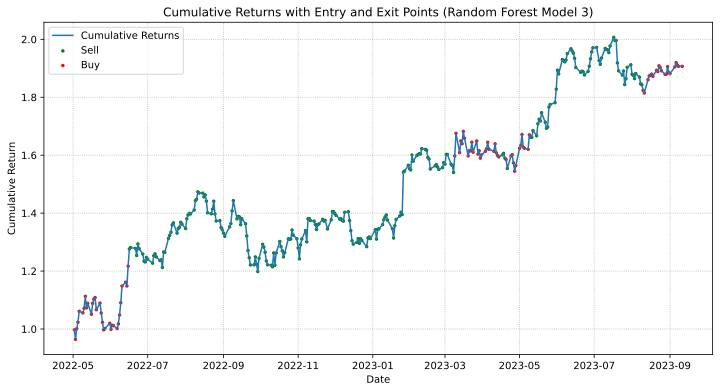

In [137]:
# get model 3 cumulative returns
cumulative_return_3 = backtesting_results_3['Cumulative Return']

# Plot cumulative returns with predicted signals 
plt.figure(figsize=(12, 6))
plt.plot(backtesting_results_3.index, cumulative_return_3, label='Cumulative Returns')
plt.scatter(backtesting_results_3[backtesting_results_3['Predicted_Signal'] == 1].index, backtesting_results_3[backtesting_results_3['Predicted_Signal'] == 1]['Cumulative Return'],  color='green', s=6, label='Sell')
plt.scatter(backtesting_results_3[backtesting_results_3['Predicted_Signal'] == -1].index, backtesting_results_3[backtesting_results_3['Predicted_Signal'] == -1]['Cumulative Return'],  color='red',  s=6, label='Buy')
plt.title('Cumulative Returns with Entry and Exit Points (Random Forest Model 3)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# remove signals from strategy 1 and target
data = data.drop(['Signal_MA','Target'], axis=1)

### Model 4 - Random Forest Classifier with MACD 
 - Features: All variables
 - Target: Signals generated by the MACD strategy
 - short_window = 5
 - long_window = 35
 - signal_period = 15

In [39]:
# Model 4

# signals produced by strategy 2 stored in the Signal_MACD column
signals = trading_strategy2(data, short_window=5,long_window=35, signal_period=15)
data['Signal_MACD']= signals['Signal_MACD']

# target column is equal to Signal moved one row up
data['Target'] = data['Signal_MACD'].shift(-1)

# remove NA created by the previous step
data = data.dropna()

# Features and target variable of model
features = ['Signal_MACD','Long_MA','Short_MA','Open', 'Close','High','Low', 'Volume','Dividends','Stock Splits', 'Daily Returns', 'Cumulative Returns']
X = data[features]
y = data['Target']

# train and test split 70/30
train_start = '2019-01-03'
train_end = '2022-04-29'
test_start = '2022-05-02'
test_end = '2023-09-29'
X_train = X[(X.index >= train_start) & (X.index <= train_end)]
X_test = X[(X.index >= test_start) & (X.index <= test_end)]
y_train = y[(y.index >= train_start) & (y.index <= train_end)]
y_test = y[(y.index >= test_start) & (y.index <= test_end)]


# Random Forest 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) 

# predict on the test set
predictions4 = rf_model.predict(X_test)

# calculate accuracy
accuracy4 = accuracy_score(y_test, predictions4)
print(f"Accuracy: {accuracy4}")

Accuracy: 0.8863636363636364


In [40]:
# backtest model 4
backtesting_results_4, volatility4, asset_mean_returns4, cagr4, total_profit4 = backtesting_strategy(predictions4, X_test, data, initial_investment=100)

Volatility: 0.3602
Expected Mean Returns: -0.0011
Cumulative Return: 0.6456
CAGR: -0.2689
Resultado Final do investimento: 64.5613


In [41]:
top_5_features = top_features(rf_model, features)
print(top_5_features)

          Feature  Importance
0     Signal_MACD    0.511705
10  Daily Returns    0.075086
2        Short_MA    0.074945
1         Long_MA    0.064170
7          Volume    0.050036


### Model 5 - Random Forest Classifier with MACD (most relevant variables)
 - Features: Signal_MACD, Daily Returns, Volume, Open, High
 - short_window = 5
 - long_window = 35
 - signal_period = 15

In [42]:
# Model 5

# signals produced by strategy 2 stored in the Signal_MACD column
signals = trading_strategy2(data,short_window=5,long_window=35, signal_period=15)
data['Signal_MACD']= signals['Signal_MACD']

# target column is equal to Signal moved one row up
data['Target'] = data['Signal_MACD'].shift(-1)

# remove NA created by the previous step
data = data.dropna()

# Features and target variable of model
features = ['Signal_MACD','Daily Returns','Volume', 'Open','High']
X = data[features]
y = data['Target']

# train and test split 70/30
train_start = '2019-01-03'
train_end = '2022-04-29'
test_start = '2022-05-02'
test_end = '2023-09-29'
X_train = X[(X.index >= train_start) & (X.index <= train_end)]
X_test = X[(X.index >= test_start) & (X.index <= test_end)]
y_train = y[(y.index >= train_start) & (y.index <= train_end)]
y_test = y[(y.index >= test_start) & (y.index <= test_end)]


# Random Forest 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  

# predict on the test set
predictions5 = rf_model.predict(X_test)

# calculate accuracy
accuracy5 = accuracy_score(y_test, predictions5)
print(f"Accuracy: {accuracy5}")

Accuracy: 0.8831908831908832


In [43]:
# backtest model 5
backtesting_results_5, volatility5, asset_mean_returns5, cagr5, total_profit5 = backtesting_strategy(predictions5, X_test, data, initial_investment=100)

Volatility: 0.3606
Expected Mean Returns: -0.0004
Cumulative Return: 0.8125
CAGR: -0.1385
Resultado Final do investimento: 81.2488


#### Best Combination MACD function 
It searches the best combination of parameters of the random forest model with MACD. 
Execution time: 8 min with break, +7 hours without break.

- In order to optimize the investment strategy using the "best_combination_macd" function, it was necessary to tackle the additional complexity that this approach presents compared to with simple Moving Averages. The inherent sophistication of MACD requires the adjustment of multiple parameters, which increases the calculation time exponentially. The initial iterations of the produced execution times were impractical, highlighting the computational challenge imposed by the problem.
Consequently, to make the process viable, an interruption condition was implemented in the function: the search for optimal combinations is stopped as soon as a return on investment above 245 is identified, thus allowing efficient optimization within the operational limits. Before reaching the 245 threshold, other break values - 200, 230 and 270 - were considered and discarded. The first two took between 1 and 3 minutes to execute, so it was considered the possibility of a break that returned a higher value at each attempt and didn't take as long to execute. When tried the value 270, the execution time increased exponentially. The breakpoint chosen, although not necessarily representing the maximum ideal solution, was recognized as a pragmatic and satisfactory solution, since the scarcity of computing resources imposed an insurmountable constraint. Thus, with a balance between maximizing returns and limiting resources, the value of 245 was established as an operational criterion for the study.


In [214]:
def best_combination_macd(data, features, short_window, long_window, signal_period):
    # apply strategy 2
    data = trading_strategy2(data, short_window, long_window, signal_period)

    # define target and drop NA
    data['Target'] = data['Signal_MACD'].shift(-1)
    data = data.dropna()

    X = data[features]
    y = data['Target']
    
    # train and test split
    train_start = '2019-01-03'
    train_end = '2022-04-29'
    test_start = '2022-05-02'
    test_end = '2023-09-29'
    X_train = X[(X.index >= train_start) & (X.index <= train_end)]
    X_test = X[(X.index >= test_start) & (X.index <= test_end)]
    y_train = y[(y.index >= train_start) & (y.index <= train_end)]
    y_test = y[(y.index >= test_start) & (y.index <= test_end)]

    # Model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    predictions = rf_model.predict(X_test)
    _, _, _, _, final_portfolio_value = backtesting_strategy(predictions, X_test, data)
    
    return final_portfolio_value

# range of values to be tested
short_windows = range(5, 35, 3)
long_windows = range(10, 50, 4)
signal_periods = range(5, 20, 2)

# all features
all_features = ['Signal_MACD', 'Long_MA','Short_MA','Daily Returns', 'Volume', 'Close', 'Open', 'Dividends', 'Cumulative Returns', 'Stock Splits']
max_profit = 0
best_combination = []

# iterate over all possible combinations of window and period values
for sw in short_windows:
    for lw in long_windows:
        for sp in signal_periods:
            # iterate over all possible combinations of features
            for r in range(1, len(all_features) + 1):
                for subset in itertools.combinations(all_features, r):
                    final_portfolio_value = best_combination_macd(data, list(subset), sw, lw, sp)
                    print(sw, lw, sp)
                    if final_portfolio_value > max_profit:
                        max_profit = final_portfolio_value
                        best_combination = subset
                        best_parameters = (sw, lw, sp)
                        break  # leave the 5th for
                if final_portfolio_value > 245:
                    break  #leave the 4th for
            if final_portfolio_value > 245:
                break  # leave the 3rd for
        if final_portfolio_value > 245:
            break  # leave the 2nd for
    if final_portfolio_value > 245:
        break  # leave the 1st for

# output of the best combination
print(f"Best Parameters: short_window={best_parameters[0]}, long_window={best_parameters[1]}, signal_period={best_parameters[2]}")
print(f"Best Combination Features: {best_combination}, Resultado Final do Investimento: {max_profit}")

Volatility: 0.3494
Expected Mean Returns: -0.0009
Cumulative Return: 0.7140
CAGR: -0.2486
Resultado Final do investimento: 71.3978
5 10 5
Volatility: 0.3497
Expected Mean Returns: 0.0002
Cumulative Return: 1.0109
CAGR: 0.0092
Resultado Final do investimento: 101.0889
5 10 5
Volatility: 0.3495
Expected Mean Returns: -0.0008
Cumulative Return: 0.7512
CAGR: -0.2155
Resultado Final do investimento: 75.1236
5 10 5
Volatility: 0.3495
Expected Mean Returns: -0.0009
Cumulative Return: 0.7274
CAGR: -0.2366
Resultado Final do investimento: 72.7418
5 10 5
Volatility: 0.3493
Expected Mean Returns: -0.0011
Cumulative Return: 0.6815
CAGR: -0.2778
Resultado Final do investimento: 68.1459
5 10 5
Volatility: 0.3485
Expected Mean Returns: -0.0017
Cumulative Return: 0.5611
CAGR: -0.3875
Resultado Final do investimento: 56.1147
5 10 5
Volatility: 0.3490
Expected Mean Returns: -0.0014
Cumulative Return: 0.6266
CAGR: -0.3274
Resultado Final do investimento: 62.6586
5 10 5
Volatility: 0.3498
Expected Mean Re

### Model 6 - Random Forest Classifier with MACD (Best combination)
 - Features: Long_MA, Volume, Close, Open, Dividends, Cumulative Returns
 - short_window = 5
 - long_window = 10
 - signal_period = 7

In [258]:
# Model 6

# signals produced by strategy 2 stored in the Signal_MACD column
signals = trading_strategy2(data, 5, 10, 7)
data['Signal_MACD']= signals['Signal_MACD']

# target column is equal to Signal moved one row up
data['Target'] = data['Signal_MACD'].shift(-1)

# remove NA created by the previous step
data = data.dropna()

# Features and target variable of model
features = ['Long_MA', 'Volume', 'Close', 'Dividends', 'Cumulative Returns']
X = data[features]
y = data['Target']

# train and test split 70/30
train_start = '2019-01-03'
train_end = '2022-04-29'
test_start = '2022-05-02'
test_end = '2023-09-29'
X_train = X[(X.index >= train_start) & (X.index <= train_end)]
X_test = X[(X.index >= test_start) & (X.index <= test_end)]
y_train = y[(y.index >= train_start) & (y.index <= train_end)]
y_test = y[(y.index >= test_start) & (y.index <= test_end)]


# Random Forest 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) 

# predict on the test set
predictions6 = rf_model.predict(X_test)

# calculate accuracy
accuracy6 = accuracy_score(y_test, predictions6)
print(f"Accuracy: {accuracy6}")



Accuracy: 0.47653429602888087


In [259]:
# backtest model 6
backtesting_results_6, volatility6, asset_mean_returns6, cagr6, total_profit6 = backtesting_strategy(predictions6, X_test, data, initial_investment=100)


Volatility: 0.3422
Expected Mean Returns: 0.0035
Cumulative Return: 2.5037
CAGR: 1.3047
Resultado Final do investimento: 250.3681


##  Plot model 6

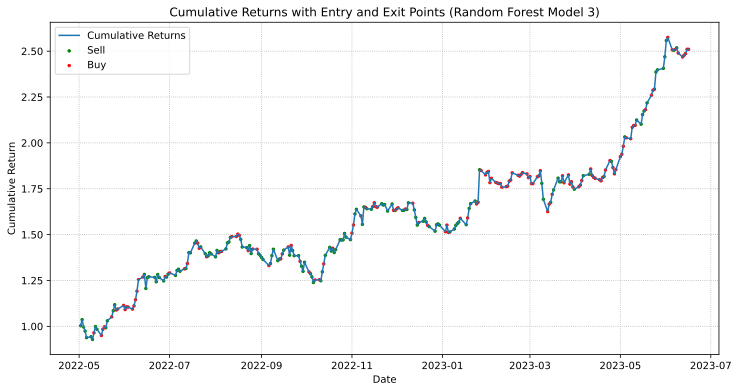

In [245]:
# get cumulative returns
cumulative_return_6 = backtesting_results_6['Cumulative Return']

# Plot the cumulative returns with entry and exit points
plt.figure(figsize=(12, 6))
plt.plot(backtesting_results_6.index, cumulative_return_6, label='Cumulative Returns')
plt.scatter(backtesting_results_6[backtesting_results_6['Predicted_Signal'] == 1].index, backtesting_results_6[backtesting_results_6['Predicted_Signal'] == 1]['Cumulative Return'],  color='green', s=6, label='Sell')
plt.scatter(backtesting_results_6[backtesting_results_6['Predicted_Signal'] == -1].index, backtesting_results_6[backtesting_results_6['Predicted_Signal'] == -1]['Cumulative Return'],  color='red',  s=6, label='Buy')
plt.title('Cumulative Returns with Entry and Exit Points (Random Forest Model 6)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

The aim was always to optimize the final return on investment, regardless of other results, such as the accuracy of the models, but açways avoiding overfitting. As for the strategies, MACD outperformed MA in terms of investment results, considering the best model for each strategy. Despite the higher return, it is less accurate, indicating that the model may be riskier. Volatility is approximately the same for the two strategies, indicating that the risk is similar. Model 6 has a higher CAGR, indicating faster annual growth.